## Placa 2D con condición de contorno en temperatura y disipación

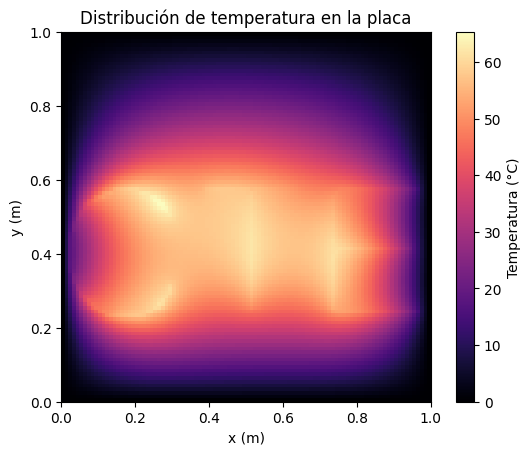

In [ ]:
import numpy as np

# Datos Placa
L = 1.0
H = L
t = 0.01

k = 1.0
qv = 500/(L*H*t)

# Condiciones de contorno
T0 = 0.0

# Malla igual
Nx = 100
Ny = Nx

dx = L/(Nx-1)
dy = dx


# Construimos la matriz y el vector Q
K = np.zeros((Nx * Ny, Nx * Ny))
Q = np.zeros(Nx * Ny)

# Añado condicion de contorno en y = 0 (T = T0) K[i,i] = 1
for i in range(Nx):
    K[i, i] = 1.0
    Q[i] = T0

# Añado condicion de contorno en y = H (T = T0) K[i,i] = 1
for i in range(Nx * (Ny - 1), Nx * Ny):
    K[i, i] = 1.0
    Q[i] = T0

# Añado condicion de contorno en x = 0 (T = T0) K[i,i] = 1
for i in range(0, Nx * Ny, Nx):
    K[i, i] = 1.0
    Q[i] = T0

# Añado condicion de contorno en x = L (T = T0) K[i,i] = 1
for i in range(Nx - 1, Nx * Ny, Nx):
    K[i, i] = 1.0
    Q[i] = T0

# CTE logo:
array_disipacion = np.load("data/cte.npy")

# Añadimos las conectividades interiores y la disipación 
for j in range(1, Ny - 1):
    for i in range(1, Nx - 1):
        n = i + j * Nx
        K[n, n] = -4.0 
        K[n, n - 1] = 1.0
        K[n, n + 1] = 1.0
        K[n, n - Nx] = 1.0
        K[n, n + Nx] = 1.0
        if array_disipacion[n]:
            r= ((i-3*Nx/5)**2 + (j-Ny/2)**2)**0.5
            w = r/((Nx/2))
            #w es un peso a la disipación para que se vea mejor
            Q[n] = -qv/k * dx**2 * w**0.9


# Resolvemos el sistema de ecuaciones
T = np.linalg.solve(K, Q)

# Pintamos la solucion con imshow
import matplotlib.pyplot as plt
T = T.reshape((Ny, Nx))


plt.imshow(T, origin='lower', extent=[0, L, 0, H], cmap='magma')
plt.colorbar(label='Temperatura (°C)')

plt.title('Distribución de temperatura en la placa')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


## Representación 3D placa

In [88]:
import numpy as np
import pyvista as pv
import helpers.configure_pyvista_notebook

# Coordenadas de nodos
x_coords = np.linspace(0, L, Nx)
y_coords = np.linspace(0, H, Ny)
z_coords = np.array([0, t])   # una sola celda en z

grid = pv.RectilinearGrid(x_coords, y_coords, z_coords)

# T es (Ny, Nx) en nodos → lo recortamos a (Ny-1, Nx-1) para celdas
T_cells = T[:-1, :-1].ravel(order='F')

# Asignar valores de CELDA directamente
grid.cell_data.clear()
grid.cell_data['temperature'] = T_cells

# Visualizar
p = pv.Plotter()
p.add_mesh(
    grid,
    scalars='temperature',
    cmap='magma',
    show_edges=True,
    edge_color='black',
    lighting=False,
    smooth_shading=False
)
p.add_bounding_box(color='gray')
p.add_scalar_bar(title='Temperatura (°C)')
p.show()


Widget(value='<iframe src="http://localhost:54332/index.html?ui=P_0x1eb732b3890_8&reconnect=auto" class="pyvis…